# Validação Cruzada / Cross Validation

Validação cruzada é uma técnica de validação de modelos para avaliar como os resultados de uma análise estatística serão generalizados para um conjunto de dados independente. 

É usada principalmente em cenários em que o objetivo é a predição e se deseja estimar a precisão com que um modelo preditivo funcionará na prática.

## Tipos
- Não exaustiva:
    - Holdout (1 execução)
    - k-Fold (k execuções)    
- Exaustiva: 
    - Leave-p-out (LpO CV - (n-p) execuções)
    - Leave-one-out (LOO CV - (n-1) execuções)


In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import datasets

## Geração do conjunto de dados

In [ ]:
rand = np.random.RandomState(42)

X = np.empty((12,2), dtype=int)
X[:, 0] = np.arange(12)
X[:, 1] = rand.randint(0, 100, 12)
y = np.concatenate((np.zeros(6, int), np.ones(6, int)))

print("X", X)
print("y", y)

df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'y': y})
df

## Validação Cruzada Holdout

Na validação cruzada típica, os resultados de várias execuções de teste de modelo são calculados em média.
Já, o método de validação envolve uma única execução.

Ver de forma mais didática no Jupyter Notebook entitulado Introdução.

In [ ]:
n = X.shape[0]
perc_train = 2/3
idx_train = np.arange(n * perc_train, dtype=int)
idx_test = np.arange(n * perc_train, n, dtype=int)

rand = np.random.RandomState(42)
indices = np.arange(X.shape[0])
rand.shuffle(indices)
X_ = X[indices]
y_ = y[indices]

X_train = X_[idx_train]
y_train = y_[idx_train]
X_test = X_[idx_test]
y_test = y_[idx_test]
print("X_train:\n", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

## Validação Cruzada Holdout usando o scikit

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=2/3, 
                                                    random_state=42, shuffle=True, stratify=y)
print("X_train:\n", X_train)
print("y_train:\n", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

## Validação Cruzada Holdout com estratificação dos labels usando o scikit

In [ ]:
X_train, y_train, X_test, y_test = model_selection.train_test_split(X, y, train_size=2/3, 
                                                    random_state=42, shuffle=True, stratify=y)
print("X_train:\n", X_train)
print("y_train:\n", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

## Validação Cruzada com k-Fold

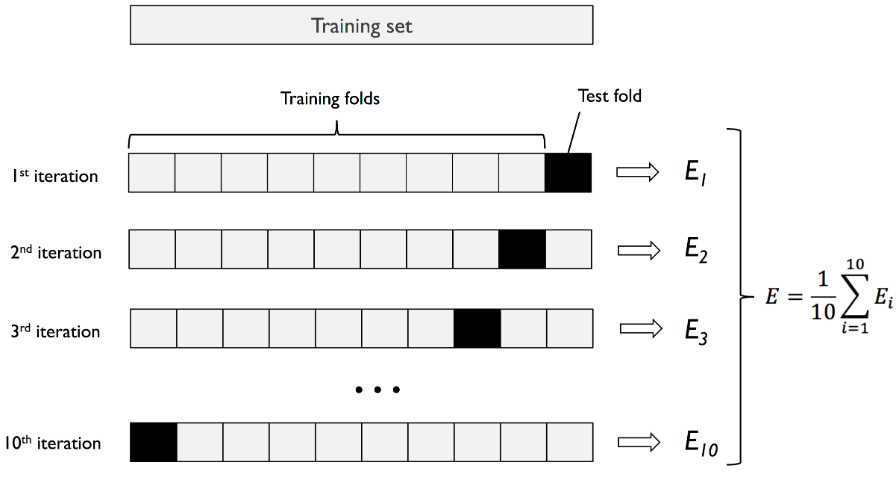

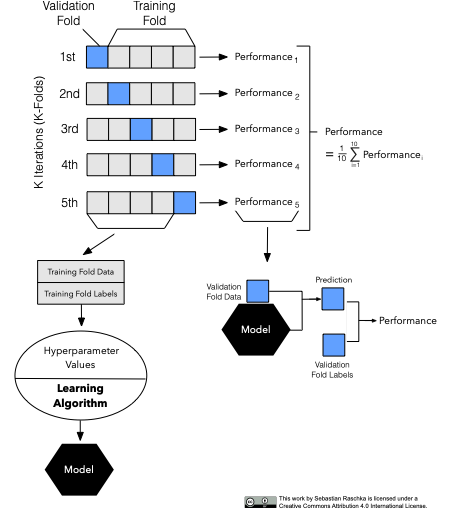

### Passos detalhados:

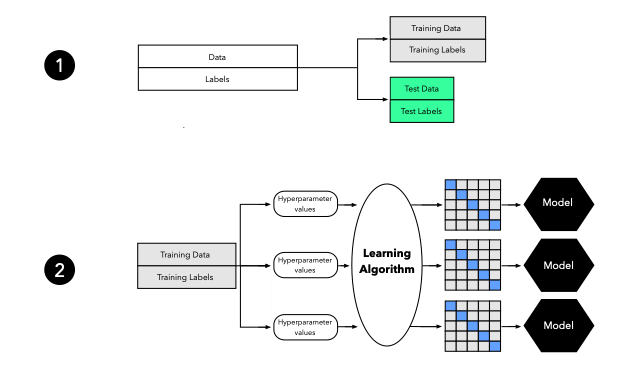

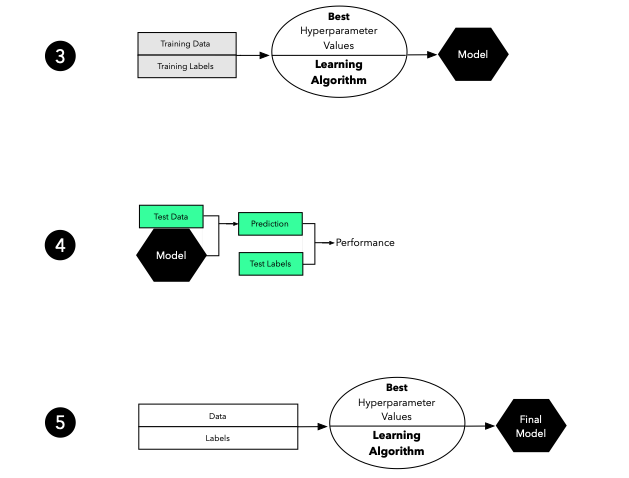

### K-Fold sem scikit

In [ ]:
# definição de índices de cada fold
k = 3
size = X.shape[0]
fold_size = size // k
curr = 0
all_idx = np.arange(0, size)
p =  [None] * k
idx_train = [None] * k
idx_val  = [None] * k

for i in range(k):
    prev = curr
    curr += fold_size
    p[i] = np.arange(prev, curr)
    idx_val[i] = p[i]
    diff = np.setdiff1d(all_idx, p[i])
    idx_train[i] = diff
    n = idx_train[i].shape[0] + idx_val[i].shape[0]
    print("Fold", i)
    print(idx_train[i].shape, idx_val[i].shape, n)
    print(idx_train[i], idx_val[i])
    X_train = X[idx_train[i]]
    y_train = y[idx_train[i]]
    X_test = X[idx_val[i]]
    y_test = y[idx_val[i]]
    print("X_train:\n", X_train)
    print("y_train:\n", y_train)
    print("X_test:", X_test)
    print("y_test:", y_test)
    print()

### K-Fold com scikit

In [ ]:
kfold = model_selection.KFold(n_splits=3, shuffle=False)
k = 0
for idx_train, idx_val in kfold.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()

### KFold com Shuffle

In [ ]:
kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
k = 0
for idx_train, idx_val in kfold.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()

### KFold Estratificado

In [ ]:
kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
k = 0
for idx_train, idx_val in kfold.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()

### Stratified Shuffle Split

In [ ]:
shufflesplit = model_selection.StratifiedShuffleSplit(n_splits=3, test_size=1/3, random_state=42)
k = 0
for idx_train, idx_val in shufflesplit.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()